<font size="+3" color=Green><b> <center><u>Text classification step by step</u></center></b></font>

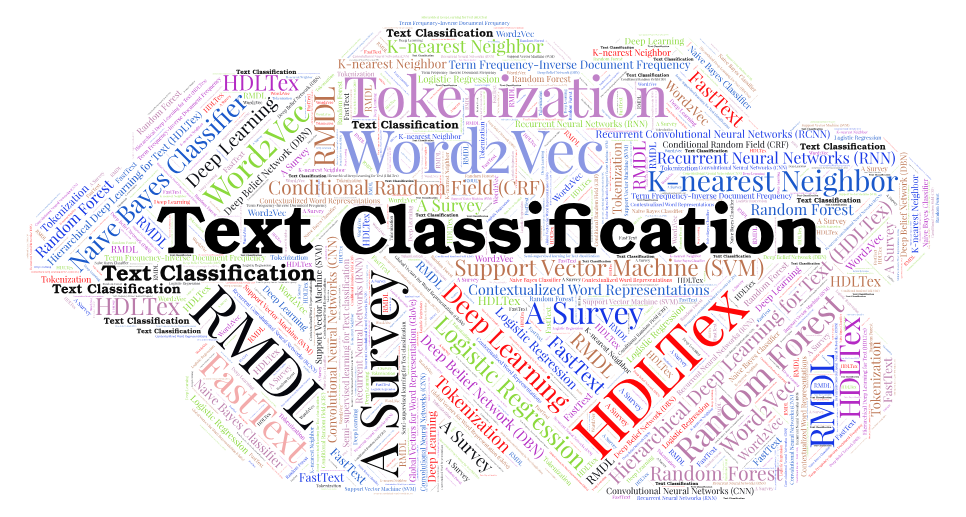

<h2 class="list-group-item list-group-item-action active"  data-toggle="list"  role="tab" aria-controls="home" > <center>Objective  </center></h2>

Goals of this kernel are the following:
- Basic Exploratory Data Analysis.
- Beginners guide to clean the dataset.
- Feature Analysis & extraction 
- Modelling and ecvaluation metrics 
- submitting the results 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Table of content </center></h2>

<font color="blue" size=+1><b>Introduction</b></font>
* [About Data ](#1.1)
    
<font color="blue" size=+1><b> Load and Check Data </b></font>
* [Importing Library](#2.1)
* [Load Dataset](#2.2)

<font color="blue" size=+1><b> Exploratory Data Analysis </b></font>
* [Missing Value Analysis](#3.1)
* [Target Variable Analysis](#3.2)    
* [Non-Target Variable Analysis](#3.3)    


<font color="blue" size=+1><b> Data Handling and Preparation </b></font>
* [Handing Missing Data ](#4.1)
* [Train Test Split ](#4.2)

<font color="blue" size=+1><b> Model Training </b></font>
* [Logistic Regression ](#5.1)
* [K-Nearest Neighbours ](#5.2)    
* [Decision Tree ](#5.3)
* [Naive Bayes ](#5.4)    
* [Linear Discriminant Analysis ](#5.5)
* [LightLGM ](#5.6)    
* [CatBoost ](#5.7)
* [XGBoost ](#5.8)    
* [Ridge Classifier ](#5.9)
* [Quadratic Discriminant Analysis ](#5.10)    
* [Bagging classifier ](#5.11)
* [MLPClassifier](#5.12)    
* [Linear Support Vector Classification ](#5.13)
* [Nu-Support Vector Classification ](#5.14)    
* [BernoulliNB ](#5.15)
* [Passive Aggressive Classifier ](#5.16)    
* [Radius Neighbors Classifier ](#5.17)
* [Stochastic Gradient Boosting ](#5.18)    
* [AdaBoost ](#5.19)
* [Extra Trees ](#5.20)    
* [Random Forest ](#5.21)
* [SVC ](#5.22)    
* [H2O ](#5.23)
* [TPOT ](#5.24)    
* [PyCaret ](#5.25)



<a id="1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Introduction  </center></h2>

<a id="1.1"></a>
<font color="blue" size=+2.5><b> About Data</b></font>
<br/>
<br/>
* **What files do I need?**

You'll need train.csv, test.csv and sample_submission.csv.

* **What should I expect the data format to be?**

Each sample in the train and test set has the following information:

1. The text of a tweet
2. A keyword from that tweet (although this may be blank!)
3. The location the tweet was sent from (may also be blank)

*** What am I predicting?**

You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

* **Files**

1. train.csv - the training set
2. test.csv - the test set
3. sample_submission.csv - a sample submission file in the correct format

## The columns in this dataset are:

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)




<a id="2"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Load and Check Data  </center></h2>

<a id="2.1"></a>
<font color="blue" size=+2.5><b> Import Libraries </b></font>

In [2]:
import pandas as pd #Pandas is easy-to-use data structures and data analysis tools for the Python programming language.
import numpy as np #Linear algebra 
import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import nltk 
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="2.2"></a>
<font color="blue" size=+2.5><b> Import Dataset </b></font>


In [3]:
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')
test_data  =pd.read_csv('../input/nlp-getting-started/test.csv')
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
train_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
#Let's display one the tweets existed in the text column 
train_data['text'][11]

'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding'

The regular expression above is meant to find any four digits at the beginning of a string, which suffices for our case. The above is a raw string (meaning that a backslash is no longer an escape character), which is standard practice with regular expressions.
regex = r'^(\d{4})'


In [6]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #Convert strings in the Series/Index to lowercase.
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data,'text', 'text_clean')
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [8]:

from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [9]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order...","[peopl, receiv, wildfir, evacu, order, califor..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [11]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)



data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_URL(x))

In [12]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_html(x))

In [13]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_emoji(x))

In [14]:

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: remove_punct(x))

In [15]:
"""!pip3 install pyspellchecker==20.2.2
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: correct_spellings(x))""" 

'!pip3 install pyspellchecker==20.2.2\nfrom spellchecker import SpellChecker\n\nspell = SpellChecker()\ndef correct_spellings(text):\n    corrected_text = []\n    misspelled_words = spell.unknown(text.split())\n    for word in text.split():\n        if word in misspelled_words:\n            corrected_text.append(spell.correction(word))\n        else:\n            corrected_text.append(word)\n    return " ".join(corrected_text)\n\ndata_clean[\'text_clean\'] = data_clean[\'text_clean\'].apply(lambda x: correct_spellings(x))'

In [16]:
freq = pd.Series(' '.join(data_clean['text_clean']).split()).value_counts()[:10]

freq = list(freq.index)
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(data_clean['text_clean'], 
                   
                                                    data_clean['target'], 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [18]:

tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_df=1.0,
                       min_df=10,
                       max_features=500,
                       norm='l2',
                       sublinear_tf=True)

In [19]:
train_features = tfidf.fit_transform(X_train).toarray()
print(train_features.shape)

(6090, 500)


In [20]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(1523, 500)


In [21]:
train_labels = Y_train
test_labels = Y_test

In [22]:

import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
mnb_classifier = MultinomialNB()

In [24]:
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [25]:
mnb_prediction = mnb_classifier.predict(test_features)

In [26]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.786863711001642


In [27]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.7662508207485227


In [28]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       861
           1       0.78      0.64      0.70       662

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.76      1523



In [29]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[743 118]
 [238 424]]


In [30]:
test_vectorizer =tfidf.transform( data_clean_test['text_clean']).toarray()

In [31]:
test_vectorizer.shape

(3263, 500)

In [32]:
final_predictions = mnb_classifier.predict(test_vectorizer)

In [33]:
final_predictions

array([1, 1, 1, ..., 1, 1, 0])

In [34]:
submission_df = pd.DataFrame()

In [35]:
submission_df['id'] = data_clean_test['id']
submission_df['target'] = final_predictions

In [36]:
submission_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [37]:
submission_df['target'].value_counts()

0    2128
1    1135
Name: target, dtype: int64

In [38]:
submission = submission_df.to_csv('Result.csv',index = False)

# WORK IN PROGRESS...